In [169]:
# Завдання 1
# Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com (https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)
import pandas as pd

df = pd.read_csv('NationalNames.csv')

In [191]:
# Завдання 2
# Виведіть перші 8 рядків набору даних.
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [192]:
# Завдання 3
# Вивести останні 8 рядків набору даних.
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [193]:
# Завдання 4
# Отримайте імена стовпців набору даних.
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [194]:
# Завдання 5
# Отримайте загальну інформацію про дані у наборі даних.
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [195]:
# Завдання 6
# Знайдіть кількість унікальних імен у наборі даних.
df['Name'].nunique()

93889

In [196]:
# Завдання 7
# Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.
df.groupby('Gender')[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


In [197]:
# Завдання 8
# Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.
df.loc[(df['Year'] == 2010) & (df['Gender'] == 'M')].sort_values(by=['Count'], ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [198]:
# Завдання 9
# Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне).
max = df[df.Count == df.Count.max()][["Name", "Year"]].values[0]
print(f"The name is '{max[0]}' in {max[1]}")

The name is 'Linda' in 1947


In [199]:
# Завдання 10
# Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
len(df[df.Count == df.Count.min()])

254615

In [200]:
# Завдання 11
# Підрахуйте кількість унікальних імен у кожному році.
df.groupby('Year').nunique()[['Name']].head()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158


In [201]:
# Завдання 12
# Знайдіть рік із найбільшою кількістю унікальних імен.
df.groupby('Year')[['Name']].nunique().sort_values(by=['Name'], ascending=False).head(1)

,Name
Year,
2008,32488


In [202]:
# Завдання 13
# Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
df[df['Year'] == df.groupby('Year')[['Name']].nunique().sort_values(by=['Name'], ascending=False).head(1).index[0]].sort_values(by=['Count'], ascending=False).head(1)['Name'].values[0]

'Jacob'

In [203]:
# Завдання 14
# Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен.
df[(df.Name == df[df['Year'] == df.groupby('Year')[['Name']].nunique().sort_values(by=['Name'], ascending=False).head(1).index[0]].sort_values(by=['Count'], ascending=False).head(1)['Name'].values[0]) & (df.Gender == 'F')].sort_values(by=['Count'], ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [204]:
# Завдання 15
# Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена).
df[df['Name'].isin(list(set(df[df.Gender=='F']['Name'].values) & set(df[df.Gender=='M']['Name'].values)))].groupby('Year').agg({'Name':'count'}).sort_values(by=['Name'], ascending=False).head(1)

,Name
Year,
2008,9914


In [205]:
# Завдання 16
# Знайдіть загальну кількість народжень за рік.
df.groupby('Year').agg({'Count':sum}).head()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


In [206]:
# Завдання 17
# Знайдіть рік, коли народилося найбільше дітей.
df.groupby('Year').agg({'Count':sum}).sort_values(by=['Count'], ascending=False).head(1).index[0]

1957

In [207]:
# Завдання 18
# Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.
df.groupby(['Year', 'Gender']).agg({'Count': sum}).unstack().Count.head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [208]:
# Завдання 19
# Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
count = df.groupby(['Year', 'Gender']).agg({'Count': sum}).unstack().Count
count[count.F > count.M].count().M

54

<AxesSubplot:xlabel='Year', ylabel='total births per year'>

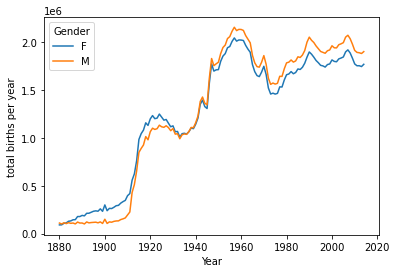

In [209]:
# Завдання 20
# Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.
count.plot(ylabel='total births per year')

In [210]:
# Завдання 21
# Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців).
len(list(set(df[df.Gender=='F']['Name'].values) & set(df[df.Gender=='M']['Name'].values)))

10221

In [211]:
# Завдання 22
# Порахуйте, скільки разів хлопчиків називали Barbara.
df[(df.Name=='Barbara') & (df.Gender=='M')].Count.sum()

4139

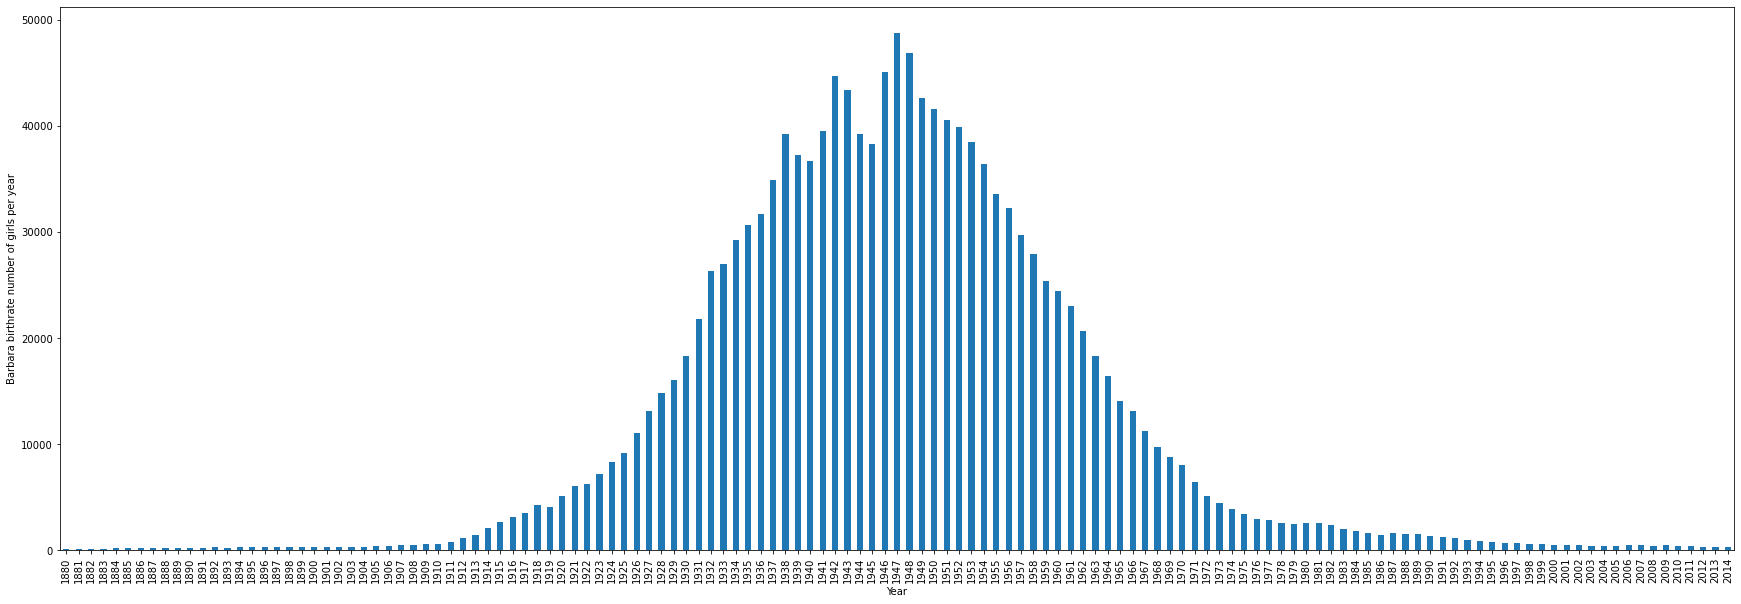

In [216]:
# Завдання 23
# Самостійно створіть 2 умови для аналізу даних цього набору даних та реалізуйте їх. 
# 1) Порахуйте, скільки разів дівчат називали Barbara.
df[(df.Name=='Barbara') & (df.Gender=='F')].Count.sum()

# 2)  Накресліть графік кількості народжень дівчат Barbara на рік. 
df[(df.Name=='Barbara') & (df.Gender=='F')].groupby(['Year']).agg({'Count': sum}).unstack().Count.plot.bar(ylabel='Barbara birthrate number of girls per year', figsize=(30,10));